In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb
from scipy.io import loadmat

In [6]:
data = loadmat('ex8data1.mat')
X = data['X']
X.shape

(307, 2)

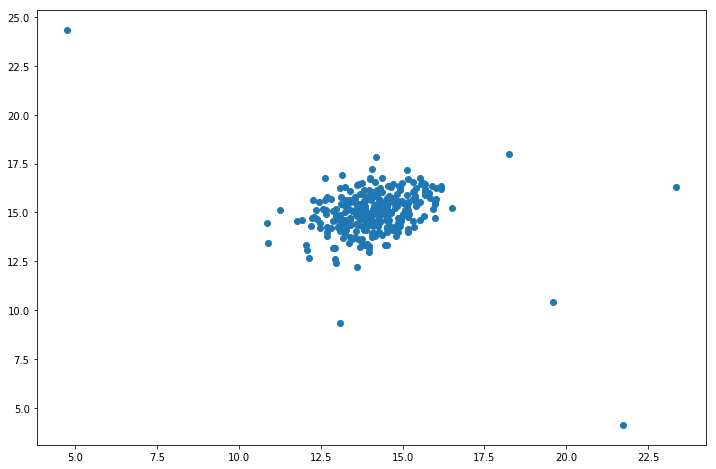

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X[:,0], X[:,1])

In [11]:
def estimate_gaussian(X):
    mu = X.mean(axis=0)
    sigma_sq = X.var(axis=0)
    return mu, sigma_sq
mu, sigma_sq = estimate_gaussian(X)
mu, sigma_sq

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [12]:
Xval = data['Xval']
yval = data['yval']

Xval.shape, yval.shape

((307, 2), (307, 1))

In [13]:
Xval, yval

(array([[15.79025979, 14.9210243 ],
        [13.63961877, 15.32995521],
        [14.86589943, 16.47386514],
        [13.58467605, 13.98930611],
        [13.46404167, 15.63533011],
        [12.94888838, 16.14006828],
        [15.31084155, 15.17480137],
        [13.89795241, 15.43169469],
        [11.92096525, 14.30579937],
        [14.85934119, 14.90066474],
        [13.63501268, 14.5620583 ],
        [15.75981741, 15.13340409],
        [15.221965  , 14.18491044],
        [12.10564111, 13.42653822],
        [14.80848889, 13.87075725],
        [15.36135887, 15.99014917],
        [12.72914442, 15.8265107 ],
        [15.38533789, 15.21036416],
        [13.81810534, 14.29933915],
        [15.3788488 , 15.90228514],
        [14.11232153, 15.31616729],
        [12.82415241, 13.6971992 ],
        [14.58354683, 14.99675181],
        [14.2948367 , 15.84651796],
        [13.5112881 , 15.5909427 ],
        [13.71433284, 15.35484382],
        [12.85788467, 14.00239134],
        [14.56998008, 14.224

In [14]:
from scipy import stats
dist = stats.norm(mu[0], sigma_sq[0])
dist.pdf(X[:, 0])[0:50]

array([0.183842  , 0.20221694, 0.21746136, 0.19778763, 0.20858956,
       0.21652359, 0.16991291, 0.15123542, 0.1163989 , 0.1594734 ,
       0.21716057, 0.21760472, 0.20141857, 0.20157497, 0.21711385,
       0.21758775, 0.21695576, 0.2138258 , 0.21057069, 0.1173018 ,
       0.20765108, 0.21717452, 0.19510663, 0.21702152, 0.17429399,
       0.15413455, 0.21000109, 0.20223586, 0.21031898, 0.21313426,
       0.16158946, 0.2170794 , 0.17825767, 0.17414633, 0.1264951 ,
       0.19723662, 0.14538809, 0.21766361, 0.21191386, 0.21729442,
       0.21238912, 0.18799417, 0.21259798, 0.21752767, 0.20616968,
       0.21520366, 0.1280081 , 0.21768113, 0.21539967, 0.16913173])

In [18]:
p = np.zeros((X.shape[0], X.shape[1]))
p[:,0] = stats.norm(mu[0], sigma_sq[0]).pdf(X[:, 0])
p[:,1] = stats.norm(mu[1], sigma_sq[1]).pdf(X[:, 1])

p.shape

(307, 2)

In [20]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))
pval[:,0] = stats.norm(mu[0], sigma_sq[0]).pdf(Xval[:, 0])
pval[:,1] = stats.norm(mu[1], sigma_sq[1]).pdf(Xval[:, 1])

pval.shape

(307, 2)

In [26]:
def select_threshold(pval, yval):
    best_epsilon = 0
    best_f1 = 0
    f1 = 0
    
    steps = (pval.max() - pval.min())/1000
    
    for epsilon in np.arange(pval.min(), pval.max(), steps):
        preds = pval < epsilon
        
        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)
        
        precision = (tp)/(tp + fp)
        recall = tp/(tp + fn)
        f1 = (2 * precision* recall)/(precision + recall)
        
        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon
    
    return best_epsilon, best_f1

epsilon, f1 = select_threshold(pval, yval)  
epsilon, f1  

/home/rahul/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


(0.009566706005956842, 0.7142857142857143)

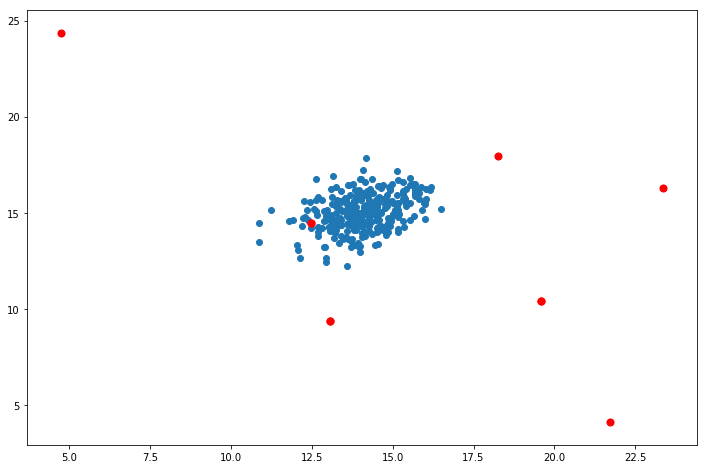

In [28]:
outliers = np.where(p < epsilon)

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(X[:, 0], X[:, 1])
ax.scatter(X[outliers[0], 0], X[outliers[0], 1], s=50, color='r', marker='o')


In [29]:
#The points in red are the ones that were flagged as outliers. Visually these seem pretty reasonable.